In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris (1).csv to Iris (1).csv


--- Baseline KNN (K=5) Performance ---
Accuracy: 1.0000

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



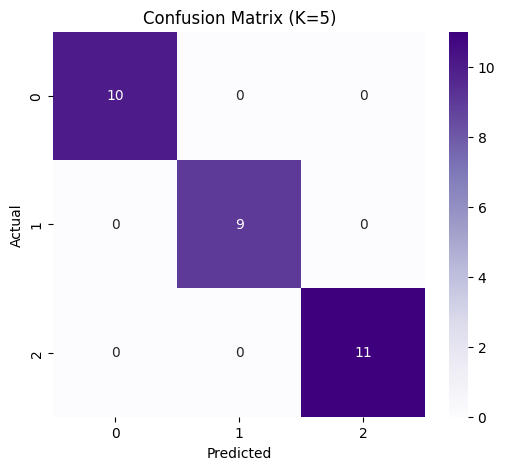

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load Data
# Ensure Iris.csv is uploaded
df = pd.read_csv('Iris (1).csv')

# Drop Id column if present
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

X = df.drop('Species', axis=1)
y = df['Species']

# 2. Preprocessing (SCALING IS CRITICAL FOR KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Train Initial Model (K=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# 5. Performance Metrics
print("--- Baseline KNN (K=5) Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualization: Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Purples', fmt='d')
plt.title('Confusion Matrix (K=5)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

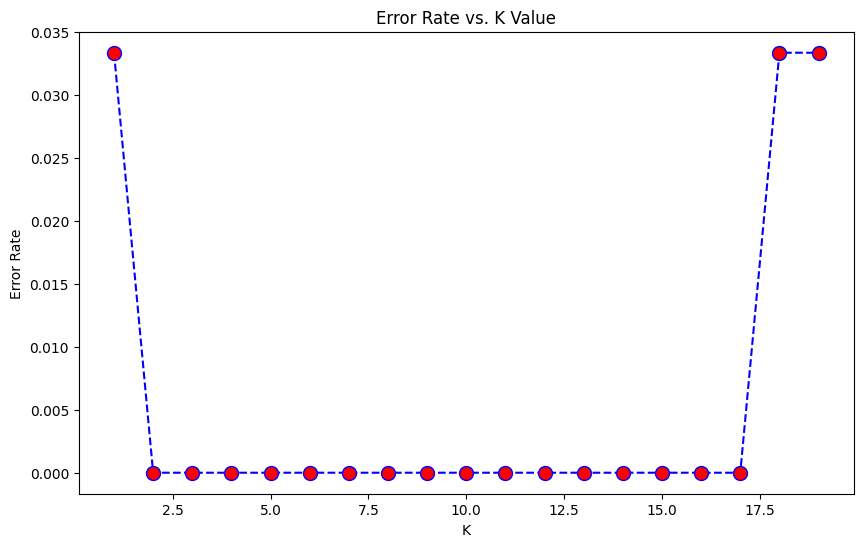

Minimum Error found at K = 2


In [ ]:
# --- HYPERPARAMETER TUNING: ELBOW METHOD ---
error_rate = []

# Will take some time
for i in range(1, 20):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train, y_train)
    pred_i = knn_i.predict(X_test)
    # Calculate average error (mean of boolean array where pred != actual)
    error_rate.append(np.mean(pred_i != y_test))

# Plot the Error Rate
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# Find minimum error
optimal_k = error_rate.index(min(error_rate)) + 1
print(f"Minimum Error found at K = {optimal_k}")